### EDA

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import spacy
from collections import Counter
import numpy as np
import warnings


### 1. Data overview:

* The dataset comprises synthetic data generated for analysis, containing 12,500 entries across various financial transactions.
* The columns include:
  - 'Description'
  - 'Amount'
  - 'Category'
  - 'Subcategory'
  - 'Date'
  - 'Company ID'
  - 'Industry'
  - 'vendor_or_consumer'
  - 'Payment Method'
  - 'Currency'
  - 'Geographical Location'
  - 'Account Number'
  - 'Reference Number'
  - 'Approval Status'
  - 'Customer Type'.
* The data types range from float64, int64 to object.


Data Overview:


,Description,Amount,Category,Subcategory,Date,Company ID,Industry,vendor_or_consumer,Payment Method,Currency,Geographical Location,Account Number,Reference Number,Approval Status,Customer Type
0,Dividends declared to shareholders from profit...,64909.01,Equity,Dividend distribution from software profits,2024-04-22,7253,Software and Tech,York-Jackson,Cash,USD,USA,70157152,5126649764,Rejected,Existing Customer
1,Acquisition of software patents to protect int...,78485.73,Asset,Patent acquisition costs for software IP prote...,2024-04-22,8176,Software and Tech,Curry-Young,Card,USD,USA,50322474,4310669829,Approved,Existing Customer
2,Sale of software licenses to corporate clients,4087.89,Revenue,Perpetual software license revenue,2024-04-22,2745,Software and Tech,Maddox-Mack,Bank Transfer,USD,USA,36147651,1663548424,Approved,Existing Customer



Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Amount,12500.0,3.105111e+05,3.473917e+05,9.458000e+01,6.302900e+03,1.586621e+05,5.903017e+05,1.472228e+06
Company ID,12500.0,5.465612e+03,2.582912e+03,1.000000e+03,3.217000e+03,5.462000e+03,7.687250e+03,9.999000e+03
Account Number,12500.0,5.496007e+07,2.574107e+07,1.000098e+07,3.326135e+07,5.458502e+07,7.711166e+07,9.999944e+07
Reference Number,12500.0,5.522988e+09,2.595218e+09,1.001642e+09,3.236100e+09,5.584768e+09,7.736410e+09,9.999815e+09



Frequency of Industry categories:


,Industry,Count
0,Software and Tech,2500
1,Real Estate,2500
2,Manufacturer,2500
3,Retail,2500
4,Healthcare,2500


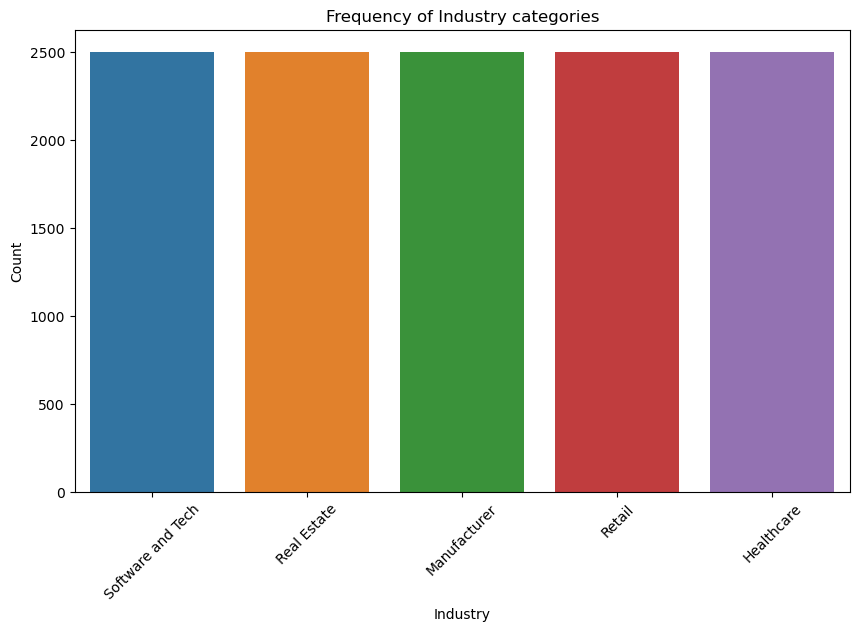


Data Types and Non-Null Count:


,Column,Data Type,Non-Null Count
0,Description,object,12500
1,Amount,float64,12500
2,Category,object,12500
3,Subcategory,object,12500
4,Date,object,12500
5,Company ID,int64,12500
6,Industry,object,12500
7,vendor_or_consumer,object,12500
8,Payment Method,object,12500
9,Currency,object,12500



Missing Values:


,Column,Missing Values
0,Description,0
1,Amount,0
2,Category,0
3,Subcategory,0
4,Date,0
5,Company ID,0
6,Industry,0
7,vendor_or_consumer,0
8,Payment Method,0
9,Currency,0


In [3]:
# Data Overview
df = pd.read_csv('merged_dataset.csv')
print("Data Overview:")
display(df.head(3))  # Display the first few rows of the dataset

# Summary Statistics
print("\nSummary Statistics:")
display(df.describe().transpose())  # Transpose the summary statistics for better readability

# Frequency of Industry categories
print("\nFrequency of Industry categories:")
industry_counts = df['Industry'].value_counts()
industry_counts_df = industry_counts.to_frame().reset_index()
industry_counts_df.columns = ['Industry', 'Count']
display(industry_counts_df)

# Visualize Frequency of Industry categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Industry', y='Count', data=industry_counts_df)
plt.title('Frequency of Industry categories')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Data Types and Non-Null Count
print("\nData Types and Non-Null Count:")
dtype_counts = df.dtypes.reset_index()
dtype_counts.columns = ['Column', 'Data Type']
non_null_counts = df.notnull().sum().reset_index()
non_null_counts.columns = ['Column', 'Non-Null Count']
data_info = pd.merge(dtype_counts, non_null_counts, on='Column')
display(data_info)

# Display Missing Values
print("\nMissing Values:")
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']
display(missing_values)

### 2. Summary Statistics:
#### Transaction Amount:

- **Interpretation:** The transaction amounts exhibit significant variability, spanning a wide range of values. The average amount provides insight into the typical transaction size within the dataset, while the standard deviation indicates the dispersion of transaction amounts around the mean.an.

### Other Numerical Columns (Company ID, Account Number, Reference Number):
- **Validity:** The company IDs, account numbers, and reference numbers provided in the dataset have been synthetically generated and may not accurately represent real-world entities.
- **Limited Utility:** While these numerical columns contribute to the dataset's structure, they may not provide meaningful insights for analysis or model training due to their synthetic n
 tasks.


### 3. Distribution of Transaction Amounts:
- **Visualization:** The KDE plot illustrates the distribution of transaction amounts across the dataset.
- **Bins:** The data was divided into 20 bins to capture the frequency distribution adequately.
- **Interpretation:** The KDE plot shows the density estimation of transaction amounts, providing insights into the central tendency and variability of the data.
- **X-axis:** Represents the transaction amounts, ranging from the minimum observed value to the maximum.
- **Y-axis:** Indicates the density of transaction amounts at each point along the distribution.
- **Figure Size:** The plot was displayed in a 10x6 inch figure for optimal visibility and clarity.

The KDE plot offers a comprehensive visualization of the distribution of transaction amounts in the dataset.


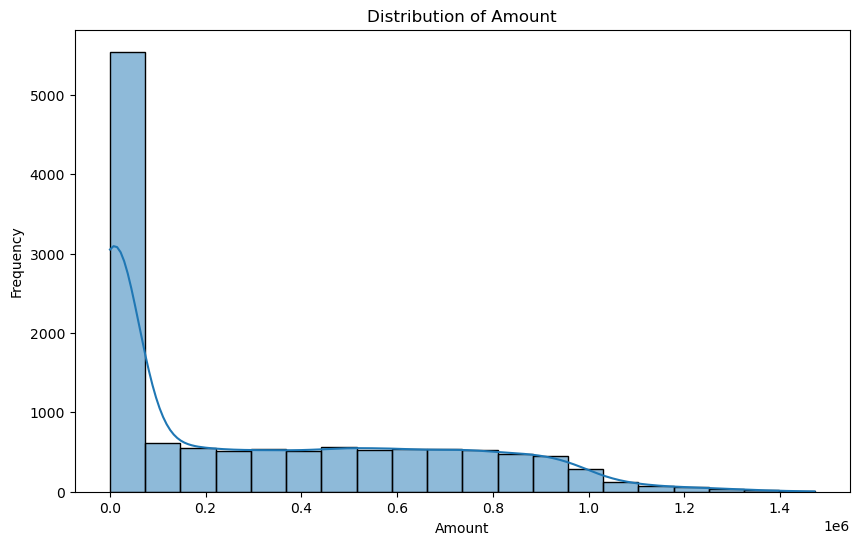

In [11]:

# Suppress FutureWarning about use_inf_as_na option
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plot the distribution (KDE plot)
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=20, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


### 4. Description Analysis

#### Overview:
The EDA focused on analyzing the textual descriptions present in the dataset's 'Description' column. Given the large range of values in the descriptions, a word cloud visualization technique was employed to visually represent the frequency of words within the descriptions.

#### Text Analysis for Description:
- **Word Cloud Visualization:** The word cloud provides a visual representation of the most frequently occurring words in the descriptions. Each word's size in the word cloud corresponds to its frequency in the dataset.
- **Interpretation:** The word cloud allows for a quick and intuitive understanding of the most prominent terms or phrases across all descriptions.
- **Figure Size:** The word cloud visualization was displayed in an 8x8 inch figure to ensure clarity and visibility of the words.


- The word cloud offers a concise yet insightful representation of the textual data present in the 'Description' column.
- By visualizing the most frequent words, patterns or common themes within the descriptions can be identified.
- Further analysis, such as sentiment analysis or topic modeling, can be performed to gain deeper insights into the textual data and uncover additional patterns or trends.


The word cloud visualization of descriptions provides a starting point for understanding the textual content of the dataset. It enables analysts to identify prominent terms or phrases and serves as a foundation for more in-depth analysis and exploration of the textual data.



Text Analysis for Description:


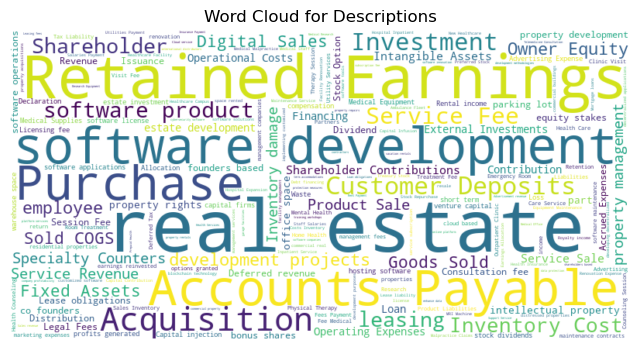

In [18]:
# Section 5: Text Analysis for 'description'
print("\nText Analysis for Description:")
# Combine all descriptions into a single string
all_descriptions = ' '.join(df['Description'])

# Generate word cloud for descriptions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Descriptions')
plt.show()

### 5. Strip Plot Analysis: Amount by Category

### Overview:
The strip plot visualization showcases the distribution of transaction amounts across different categories present in the dataset. Each data point represents an individual transaction, with the y-axis indicating the transaction amount and the x-axis denoting the respective category.

### Observations:
#### Revenue Category:
- The strip plot illustrates that the 'Revenue' category exhibits a notably higher frequency of transactions compared to other categories. This suggests that the dataset contains a substantial number of revenue-generating transactions.
#### Asset, Expense, Equity, and Liability Categories:
- In contrast, categories such as 'Asset', 'Expense', 'Equity', and 'Liability' demonstrate relatively fewer transaction occurrences, as evident from the sparser distribution of data points along the y-axis.
#### Other Income Category:
- Additionally, the 'Other Income' category appears to have fewer transaction values compared to the 'Revenue' category, indicating a lesser prevalence of such transactions in the dataset.

### Conclusion:
- The strip plot effectively highlights the distribution of transaction amounts across different categories, emphasizing the prominence of revenue-related transactions.
- Transactions categorized under 'Asset', 'Expense', 'Equity', and 'Liability' exhibit lower frequencies, suggesting a comparatively lesser representation of these transaction types in the dataset.
- The visualization aids in identifying patterns and disparities in transaction frequencies across various categories, providing valuable insights into the dataset's composition and distribution of transaction amounts.


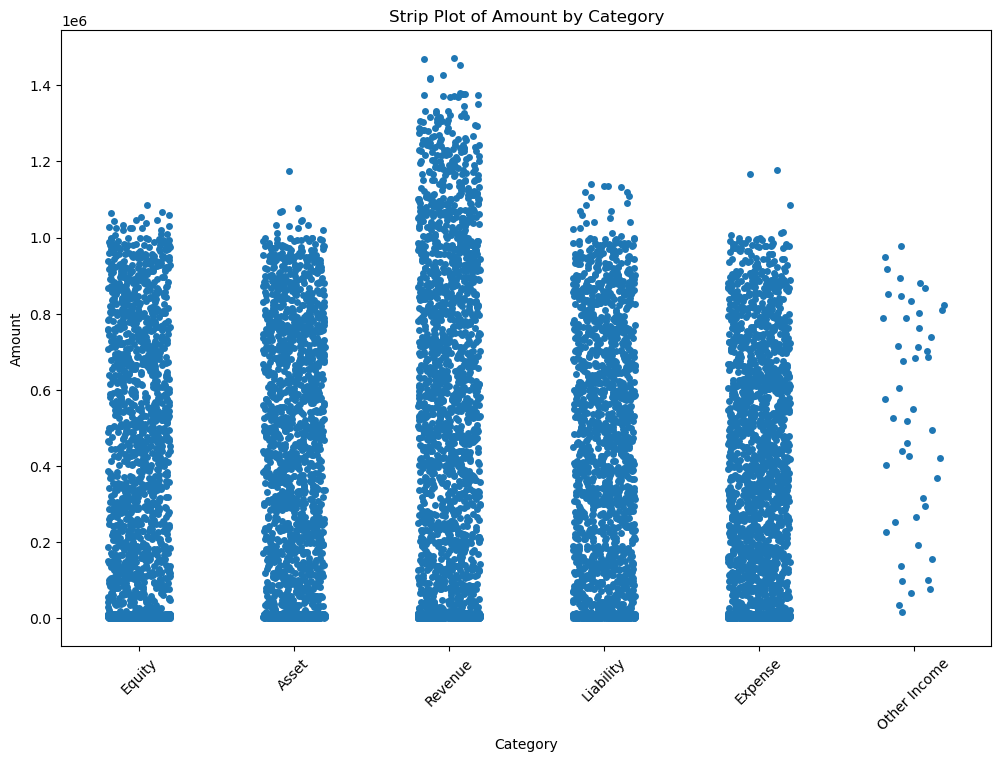

In [21]:
# Create strip plot with the subsampled data
plt.figure(figsize=(12, 8))
sns.stripplot(x='Category', y='Amount', data=df, jitter=0.2, size=5)
plt.title('Strip Plot of Amount by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

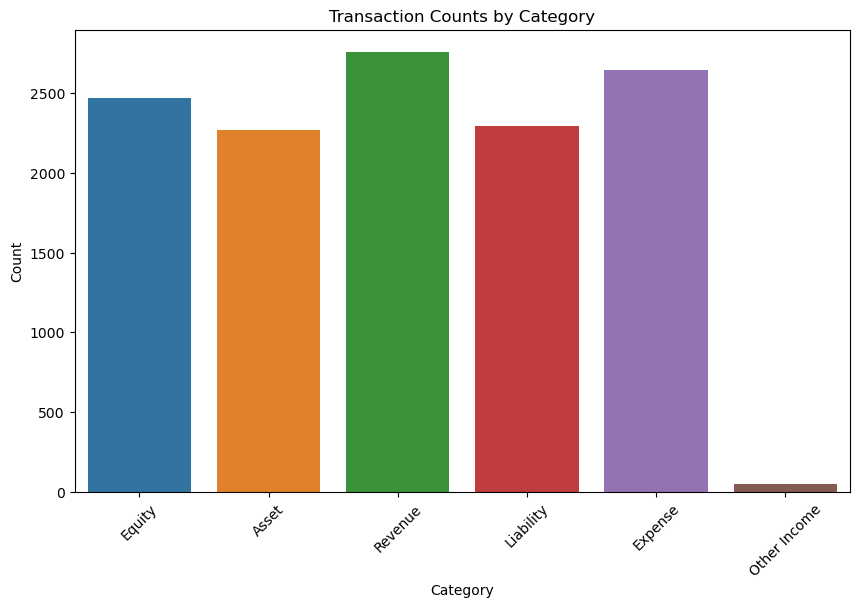

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df)
plt.title('Transaction Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Considerations for Implementing an AI Model

**Feature Selection**

**Numeric Features:**
- Consider using numeric features such as 'Amount' as they provide quantitative information about transactions.

**Categorical Features:**
- Utilize categorical features such as 'Category', 'Subcategory', 'Industry', and 'Payment Method' after encoding them appropriately.

**Date Features:**
- Extract relevant information from the 'Date' column, such as month, day of the week, or season, which could capture seasonal trends or periodic patterns in transactions.

**Text Features:**
- Explore the 'Description', 'Subcategory' columns for text analysis to extract additional insights or sentiment related to transactions.

**Target Variable:**
- Based on the business objective. It could be predicting the category or subcategory of transactions, identifying fraudulent transactions, forecasting transaction amounts, or predicting approval status.
- Ensure the target variable is well-defined, accurately labeled, and aligns with the business problem.
